# Decomposing a Matrix

In [6]:
import numpy as np
A = np.array([[5,4,3],[4,7,2],[3,2,7]])
B = np.array([[10,12],[12,17]])
C= np.array(([1,1],[2,2]))

In [110]:
A

array([[5, 4, 3],
       [4, 7, 2],
       [3, 2, 7]])

In [111]:
eval, evec = np.linalg.eig(A)

In [7]:
eval, evec = np.linalg.eig(C)

In [8]:
eval

array([0., 3.])

In [9]:
evec

array([[-0.70710678, -0.4472136 ],
       [ 0.70710678, -0.89442719]])

In [112]:
vec1=np.array(evec[:,0])

In [113]:
vec2 = np.array(evec[:,1])

In [114]:
vec3=np.array(evec[:,2])

In [116]:
mat1 = eval[0]*np.dot(vec1[:,None],vec1[None,:])
mat1

array([[3.88732586, 4.31353798, 3.78535971],
       [4.31353798, 4.78648062, 4.20039211],
       [3.78535971, 4.20039211, 3.68606817]])

In [117]:
mat2=eval[1]*np.dot(vec2[:,None],vec2[None,:])
mat2

array([[ 1.05123468, -0.64745071, -0.34176106],
       [-0.64745071,  0.39876197,  0.2104891 ],
       [-0.34176106,  0.2104891 ,  0.11110804]])

In [118]:
mat3=eval[2]*np.dot(vec3[:,None],vec3[None,:])
mat3

array([[ 0.06143946,  0.33391273, -0.44359864],
       [ 0.33391273,  1.81475741, -2.41088121],
       [-0.44359864, -2.41088121,  3.20282379]])

In [119]:
mat1+mat2+mat3

array([[5., 4., 3.],
       [4., 7., 2.],
       [3., 2., 7.]])

# Singular Value Decomposition

In [145]:
B = np.array([[2,3,4],[1,5,0]])
B

array([[2, 3, 4],
       [1, 5, 0]])

In [146]:
C = B.T
C

array([[2, 1],
       [3, 5],
       [4, 0]])

In [147]:
bbt = B@C
bbt

array([[29, 17],
       [17, 26]])

In [148]:
btb = C@B
btb

array([[ 5, 11,  8],
       [11, 34, 12],
       [ 8, 12, 16]])

In [149]:
eval1, evec1 = np.linalg.eig(bbt)
eval1

array([44.56604817, 10.43395183])

In [165]:
evec1

array([[ 0.73752756, -0.67531703],
       [ 0.67531703,  0.73752756]])

In [150]:
eval2, evec2 = np.linalg.eig(btb)
np.round(eval2,2)

array([44.57,  0.  , 10.43])

In [166]:
evec2

array([[ 0.32211546, -0.18980669, -0.92747779],
       [ 0.83723059,  0.51442816,  0.18549556],
       [ 0.4419124 , -0.83626377,  0.32461723]])

In [153]:
np.round(eval2,decimals=2)

array([44.57,  0.  , 10.43])

In [154]:
evec2[:,[1,2]]=-evec2[:,[2,1]]
evec2

array([[ 0.32211546, -0.18980669, -0.92747779],
       [ 0.83723059,  0.51442816,  0.18549556],
       [ 0.4419124 , -0.83626377,  0.32461723]])

In [168]:
sigma = np.array([[eval1[0]**0.5,0,0],[0,eval1[1]**0.5,0]])
sigma

array([[6.67578072, 0.        , 0.        ],
       [0.        , 3.23016282, 0.        ]])

In [48]:
sigma = [[eval1[0]**0.5,0,0],[0,eval1[1]**0.5,0]]
sigma

[[6.67578071583212, 0, 0], [0, 3.2301628185161175, 0]]

In [49]:
np.round(evec1 @ sigma @ evec2.T,decimals = 3)

array([[2., 3., 4.],
       [1., 5., 0.]])

Verified, now we verify for the decomposition in several terms

In [156]:
vec11=np.array(evec1[:,0])
vec11

array([0.73752756, 0.67531703])

In [157]:
vec12=np.array(evec2[:,0])
vec12

array([0.32211546, 0.83723059, 0.4419124 ])

In [159]:
matr1 = (eval1[0]**0.5)*np.dot(vec11[:,None],vec12[None,:])
matr1

array([[1.58595874, 4.12216534, 2.17578762],
       [1.45218294, 3.77446025, 1.9922597 ]])

In [160]:
vec21=np.array(evec1[:,1])
vec21

array([-0.67531703,  0.73752756])

In [161]:
vec22=np.array(evec2[:,1])
vec22

array([-0.18980669,  0.51442816, -0.83626377])

In [163]:
matr2 = (eval1[1]**0.5)*np.dot(vec21[:,None],vec22[None,:])
matr2

array([[ 0.41404126, -1.12216534,  1.82421238],
       [-0.45218294,  1.22553975, -1.9922597 ]])

In [164]:
np.round(matr1+matr2,decimals=3)

array([[2., 3., 4.],
       [1., 5., 0.]])

Using SVD from numpy

In [169]:
U, s, V = np.linalg.svd(B) 

In [170]:
S=[[s[0],0,0],[0,s[1],0]]
np.round(U@ S @V,decimals=3)

array([[ 2.,  3.,  4.],
       [ 1.,  5., -0.]])

# PCA 

# Toy Example

In [59]:
Y = [[8,4,9,1,5],
[9,6,9,5,5],
[10,8,9,7,5],
[10,5,9,6,5],
[5,4,9,2,5],
[2,7,9,9,5],
[7,5,9,8,6],
[3,4,9,8,5],
[4,2,9,7,5],
[1,4,9,10,5]]
columnnames = ['Location','City','Society','Ambience','Vicinity to Airport']
rownames = ['House 1','House 2','House 3','House 4','House 5','House 6','House 7','House 8','House 9','House 10'] 

In [60]:
import pandas as pd
Y = pd.DataFrame(Y, columns = columnnames, index=rownames)
Y

,Location,City,Society,Ambience,Vicinity to Airport
House 1,8,4,9,1,5
House 2,9,6,9,5,5
House 3,10,8,9,7,5
House 4,10,5,9,6,5
House 5,5,4,9,2,5
House 6,2,7,9,9,5
House 7,7,5,9,8,6
House 8,3,4,9,8,5
House 9,4,2,9,7,5
House 10,1,4,9,10,5


In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
results = pca.fit(Y) 

In [62]:
results.components_

array([[-8.08043525e-01, -1.05099654e-01,  0.00000000e+00,
         5.79671724e-01,  6.46182619e-04],
       [-4.50728592e-01, -5.22540662e-01, -0.00000000e+00,
        -7.23006030e-01, -3.25157301e-02],
       [-3.77102721e-01,  8.44981400e-01,  1.11022302e-16,
        -3.72386432e-01, -7.16122688e-02],
       [-4.12666429e-02,  4.37236046e-02, -8.32667268e-17,
        -5.07081639e-02,  9.96902198e-01],
       [ 0.00000000e+00, -9.05399047e-17, -1.00000000e+00,
        -5.21260148e-17, -3.85487933e-16]])

In [63]:
results.components_[0]@results.components_[1]

-5.551115123125783e-17

In [64]:
np.round(results.components_,decimals=3)

array([[-0.808, -0.105,  0.   ,  0.58 ,  0.001],
       [-0.451, -0.523, -0.   , -0.723, -0.033],
       [-0.377,  0.845,  0.   , -0.372, -0.072],
       [-0.041,  0.044, -0.   , -0.051,  0.997],
       [ 0.   , -0.   , -1.   , -0.   , -0.   ]])

In [65]:
Y_new = results.transform(Y)

In [66]:
Y_new

array([[-4.67462647e+00,  3.35894009e+00,  4.28410343e-01,
         4.30518544e-02,  3.96302586e-16],
       [-3.37418241e+00, -1.02889395e+00,  2.51724692e-01,
        -1.13600235e-01,  6.71871726e-18],
       [-3.23308179e+00, -3.97071593e+00,  8.19811906e-01,
        -1.68835996e-01, -2.78613122e-16],
       [-3.49745455e+00, -1.68008791e+00, -1.34274586e+00,
        -2.49298646e-01,  4.51326072e-17],
       [-1.67082417e+00,  3.98811983e+00,  1.18733207e+00,
         1.16143619e-01,  3.44176571e-16],
       [ 4.49570951e+00, -1.28835859e+00,  2.24687941e+00,
         1.61572149e-02, -2.92325247e-16],
       [ 8.66656522e-02, -1.80642993e+00, -1.02782283e+00,
         7.69987153e-01, -4.44607355e-16],
       [ 3.42329322e+00,  5.51540835e-01, -2.92781076e-01,
        -1.05572078e-01,  3.14204824e-17],
       [ 2.24577728e+00,  1.86889960e+00, -1.98746016e+00,
        -1.83577766e-01,  2.64626307e-16],
       [ 6.19872372e+00,  6.98595839e-03, -2.83348497e-01,
        -1.24455120e-01

In [67]:
#Check the new features
np.round(Y_new,decimals=3)

array([[-4.675,  3.359,  0.428,  0.043,  0.   ],
       [-3.374, -1.029,  0.252, -0.114,  0.   ],
       [-3.233, -3.971,  0.82 , -0.169, -0.   ],
       [-3.497, -1.68 , -1.343, -0.249,  0.   ],
       [-1.671,  3.988,  1.187,  0.116,  0.   ],
       [ 4.496, -1.288,  2.247,  0.016, -0.   ],
       [ 0.087, -1.806, -1.028,  0.77 , -0.   ],
       [ 3.423,  0.552, -0.293, -0.106,  0.   ],
       [ 2.246,  1.869, -1.987, -0.184,  0.   ],
       [ 6.199,  0.007, -0.283, -0.124, -0.   ]])

In [68]:
original = results.inverse_transform(Y_new)
np.round(original,2)
#see that the column with no variance has been returned as it is

array([[ 8.,  4.,  9.,  1.,  5.],
       [ 9.,  6.,  9.,  5.,  5.],
       [10.,  8.,  9.,  7.,  5.],
       [10.,  5.,  9.,  6.,  5.],
       [ 5.,  4.,  9.,  2.,  5.],
       [ 2.,  7.,  9.,  9.,  5.],
       [ 7.,  5.,  9.,  8.,  6.],
       [ 3.,  4.,  9.,  8.,  5.],
       [ 4.,  2.,  9.,  7.,  5.],
       [ 1.,  4.,  9., 10.,  5.]])

In [69]:
eigenvalues = results.explained_variance_
eigenvalues

array([1.49021602e+01, 6.17284113e+00, 1.59473423e+00, 8.58199814e-02,
       1.73412859e-33])

In [70]:
eigenvectors = results.components_
np.round(eigenvectors,2)
#one can notice that for third feature, the contribution of 'Society' feature is zero in all three eigenvectors because ???
#Also, for the 'fifth' feature, i.e. 'Vicinity to airport', the contribution is less because there is very less variance in the data for that feature

array([[-0.81, -0.11,  0.  ,  0.58,  0.  ],
       [-0.45, -0.52, -0.  , -0.72, -0.03],
       [-0.38,  0.84,  0.  , -0.37, -0.07],
       [-0.04,  0.04, -0.  , -0.05,  1.  ],
       [ 0.  , -0.  , -1.  , -0.  , -0.  ]])

In [71]:
np.round(results.explained_variance_ratio_,3)

array([0.655, 0.271, 0.07 , 0.004, 0.   ])

# Eigenfaces

In [192]:
#Loading LFW dataset from SKlearn
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In [193]:
faces.images

array([[[ 82.666664,  87.666664,  65.333336, ..., 105.666664,
         100.      ,  90.333336],
        [ 89.666664,  94.666664,  53.333332, ..., 107.      ,
         102.333336,  94.666664],
        [ 94.333336,  87.333336,  60.      , ...,  85.666664,
          98.      ,  94.333336],
        ...,
        [ 22.666666,  26.      ,  32.666668, ..., 102.      ,
          99.      , 109.      ],
        [ 22.333334,  25.333334,  29.333334, ..., 107.      ,
         106.      , 147.33333 ],
        [ 29.333334,  30.333334,  33.666668, ..., 106.      ,
         140.      , 199.33333 ]],

       [[ 52.333332,  49.333332,  69.333336, ...,  83.      ,
          48.333332,  37.666668],
        [ 42.      ,  46.      ,  71.      , ..., 119.      ,
          76.333336,  51.      ],
        [ 38.      ,  50.333332,  78.666664, ..., 145.      ,
         107.      ,  68.      ],
        ...,
        [138.      , 112.333336,  67.666664, ..., 229.      ,
         225.33333 , 218.      ],
        [127

In [194]:
faces.images[0][54]

array([104.666664, 106.666664, 102.333336,  95.      ,  85.      ,
        80.      ,  90.666664, 105.666664, 103.666664, 109.      ,
       119.333336, 124.333336, 126.333336, 139.66667 , 149.      ,
       142.66667 , 123.666664, 117.      , 122.333336, 129.66667 ,
       143.66667 , 147.      , 147.33333 , 143.66667 , 141.      ,
       142.33333 , 154.66667 , 170.      , 184.      , 184.66667 ,
       174.33333 , 162.      , 151.33333 , 146.33333 , 140.66667 ,
       135.      , 131.33333 , 134.33333 , 145.33333 , 135.66667 ,
       111.333336,  86.666664,  75.      ,  71.      ,  72.333336,
        87.      , 100.      ], dtype=float32)

In [195]:
#Importing standard libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

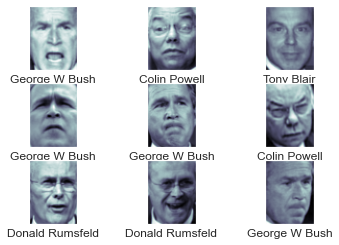

In [196]:
#Displaying a few images with labels
startindex = 100
fig, axi = plt.subplots(3, 3)
for i, axi in enumerate(axi.flat):
    axi.imshow(faces.images[i+startindex], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i+startindex]])

In [197]:
#Import PCA libraries and create a PCA instance
from sklearn.decomposition import PCA
pca = PCA(n_components = 800)
pca.fit(faces.data)

PCA(n_components=800)

In [198]:
len(pca.components_[2])

2914

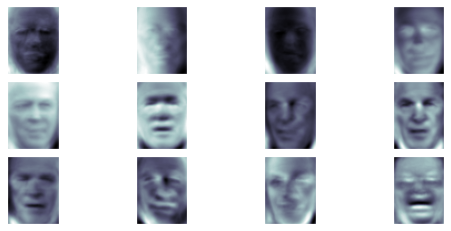

In [199]:
#Plotiing reduced dimensional data:
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

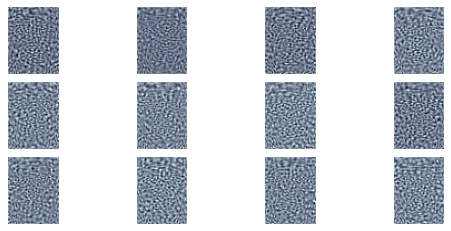

In [200]:
#Plotiing reduced dimensional data:
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i+700].reshape(62, 47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

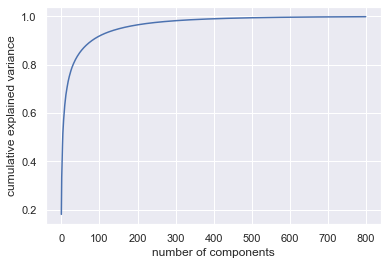

In [96]:
#commultative variance:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, '100-dim\nreconstruction')

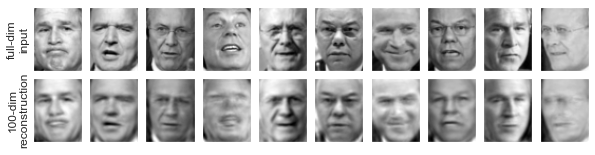

In [97]:
# Compute the components and projected faces
pca = PCA(n_components = 100).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

#COmparing the original and reconstructed faces:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction')

In [98]:
(3023*1000+2914*1000+1000)/(3023*2914)

0.6740816403909538

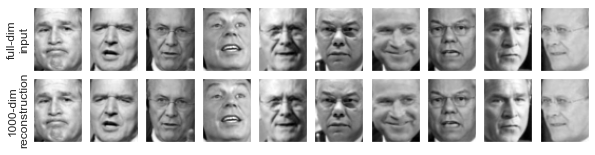

In [99]:
#COmparing the original and reconstructed faces:
# Plot the results
pca = PCA(1000).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('1000-dim\nreconstruction');

In [100]:
#PCA VISUALIZATION:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

RandomState(MT19937)


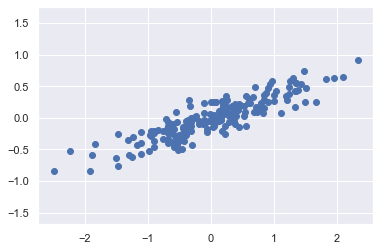

In [101]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
print(rng)

In [102]:
C=np.cov(X.T)
print(C)

[[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


In [103]:
evec, eval=np.linalg.eig(C)
print(eval)
print(evec)

[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]
[0.7625315 0.0184779]


In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [105]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


In [106]:
#Dimension Reduction:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


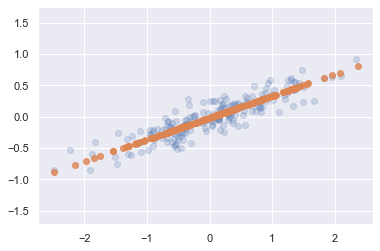

In [107]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Digits Data

In [108]:
#Import the digit data:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

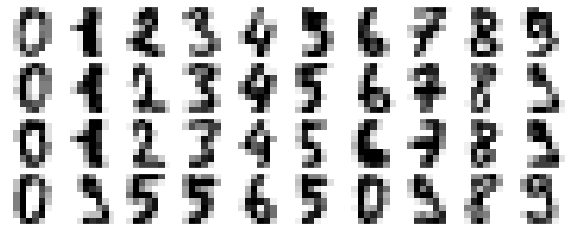

In [109]:
#Visualizing the Data
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [110]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [111]:
digits.data[1342][54]

1.0

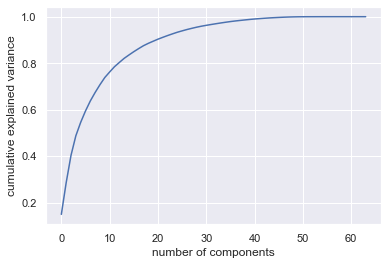

In [112]:
#Checking cumultative variance:
import numpy as np
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Iris DataSet

In [113]:
#PCA for Iris Dataset:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [114]:
#Importing Data:
iris = datasets.load_iris()

In [115]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [116]:
X=iris.data
y=iris.target

In [117]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [118]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

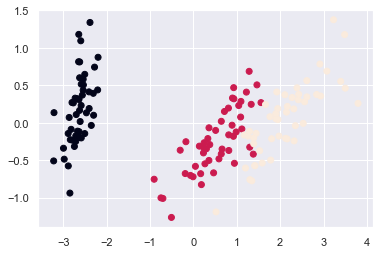

In [119]:
#Applying PCA and reducing the direction as 2:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
plt.scatter(X[:, 0], X[:, 1], c=iris.target)

# SVD Example

# Applications

In [171]:
#if CV is not already installed, uncomment this and run this block of code
#import sys
#!{sys.executable} -m pip install opencv-python

In [172]:
import numpy as np
import pandas as pd
import cv2 as cv
#from cv import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [173]:
## TODO: LOAD IMAGE
url = "https://cloudfront-us-east-2.images.arcpublishing.com/reuters/WZOGRHKGYJIM7BGC2SXBBEZ4NM.jpg"
url = "https://www.lavanguardia.com/files/og_thumbnail/uploads/2022/01/29/61f533e43523a.png"
url = "https://upload.wikimedia.org/wikipedia/commons/6/6a/Holi_Festival_of_Colors_Utah%2C_United_States_2013.jpg"

#url = "https://mediacloud.theweek.co.uk/image/private/s--X-WVjvBW--/f_auto,t_content-image-full-desktop@1/v1604799038/theweek/2019/01/novak_djokovic_rafael_nadal_roger_federer_tennis_grand_slam_titles_getty_images.jpg"
#url = "https://www.iitr.ac.in/assets/56f4da26ed956730309fa1488611ee0f13b0ac95ebb1bc9b5d210e31ff70e79c_carousel_1.png"

myImg = io.imread("classphoto.jpg")
#myImg = io.imread(url)

In [174]:
myImg.shape

(3008, 4000, 3)

In [175]:
myImg

array([[[132, 127, 124],
        [130, 125, 122],
        [132, 127, 124],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [117, 117, 117]],

       [[134, 129, 126],
        [132, 127, 124],
        [130, 125, 122],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [119, 119, 119]],

       [[133, 128, 125],
        [132, 127, 124],
        [128, 123, 120],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [119, 119, 119]],

       ...,

       [[123, 125, 122],
        [120, 122, 119],
        [125, 127, 126],
        ...,
        [159,  80,  75],
        [159,  82,  76],
        [159,  84,  78]],

       [[126, 128, 127],
        [120, 122, 121],
        [125, 127, 126],
        ...,
        [157,  80,  74],
        [161,  88,  82],
        [165,  92,  86]],

       [[124, 126, 125],
        [123, 125, 124],
        [122, 124, 123],
        ...,
        [158,  83,  77],
        [166,  93,  87],
        [163,  92,  86]]

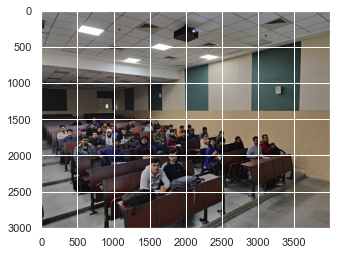

In [176]:
plt.imshow(myImg)

In [127]:
myImg.shape

(3008, 4000, 3)

In [177]:
myImgnew = myImg.reshape(myImg.shape[0],myImg.shape[1]*myImg.shape[2])
myImgnew.shape

(3008, 12000)

In [178]:
myImg.shape

(3008, 4000, 3)

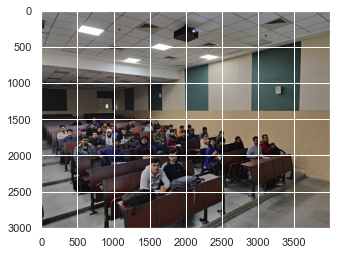

In [179]:
plt.imshow(myImg)

In [180]:
# Perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(myImgnew) 

In [181]:
U.shape

(3008, 3008)

In [182]:
s.shape

(3008,)

In [183]:
V.shape

(12000, 12000)

In [184]:
# Compute Variance explained by each singular vector
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained

array([0.84 , 0.035, 0.027, ..., 0.   , 0.   , 0.   ])

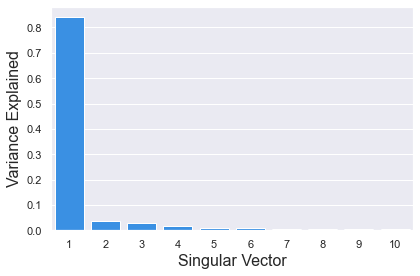

In [185]:
import seaborn as sns
sns.barplot(x=list(range(1,11)),
            y=var_explained[0:10], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


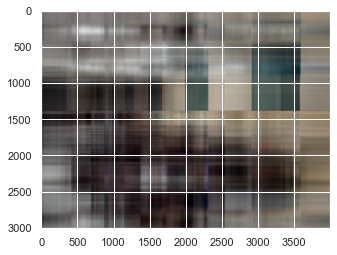

In [186]:
#Reconstruction with top 5 singular values
num_components = 5
reconst_img_5 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
reconst_img_5 = reconst_img_5.reshape(myImg.shape[0],myImg.shape[1],myImg.shape[2])
reconst_img_5 = np.round(reconst_img_5)
reconst_img_5 = reconst_img_5.astype(int)
plt.imshow(reconst_img_5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


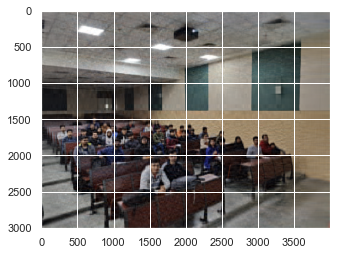

In [187]:
#Reconstruction with top 50 singular values
num_components = 50
reconst_img_50 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
reconst_img_50 = reconst_img_50.reshape(myImg.shape[0],myImg.shape[1],myImg.shape[2])
reconst_img_50 = np.round(reconst_img_50)
reconst_img_50 = reconst_img_50.astype(int)
plt.imshow(reconst_img_50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


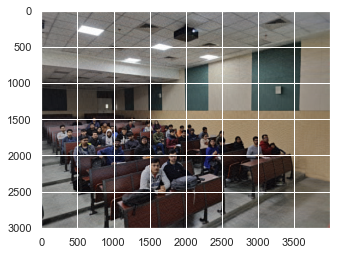

In [188]:
#Reconstruction with top 100 singular values
num_components = 100
reconst_img_100 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
reconst_img_100 = reconst_img_100.reshape(myImg.shape[0],myImg.shape[1],myImg.shape[2])
reconst_img_100 = np.round(reconst_img_100)
reconst_img_100 = reconst_img_100.astype(int)
plt.imshow(reconst_img_100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


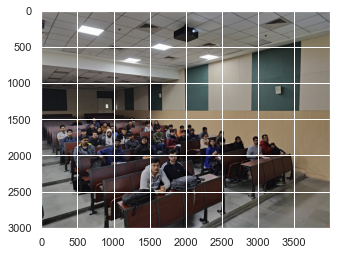

In [189]:
#Reconstruction with top 500 singular values
num_components = 500
reconst_img_500 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
reconst_img_500 = reconst_img_500.reshape(myImg.shape[0],myImg.shape[1],myImg.shape[2])
reconst_img_500 = np.round(reconst_img_500)
reconst_img_500 = reconst_img_500.astype(int)
plt.imshow(reconst_img_500)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


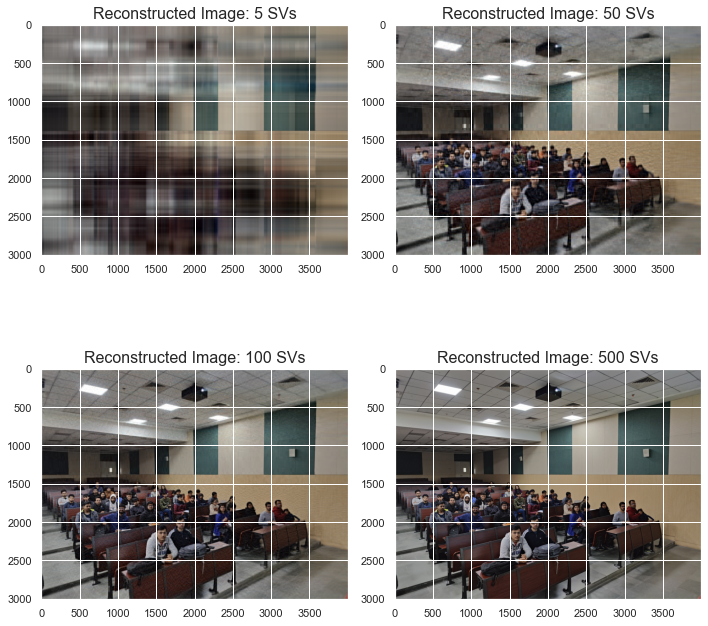

In [190]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(reconst_img_5)
axs[0, 0].set_title('Reconstructed Image: 5 SVs', size=16)
axs[0, 1].imshow(reconst_img_50)
axs[0, 1].set_title('Reconstructed Image: 50 SVs', size=16)
axs[1, 0].imshow(reconst_img_100)
axs[1, 0].set_title('Reconstructed Image: 100 SVs', size=16)
axs[1, 1].imshow(reconst_img_500)
axs[1, 1].set_title('Reconstructed Image: 500 SVs', size=16)
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


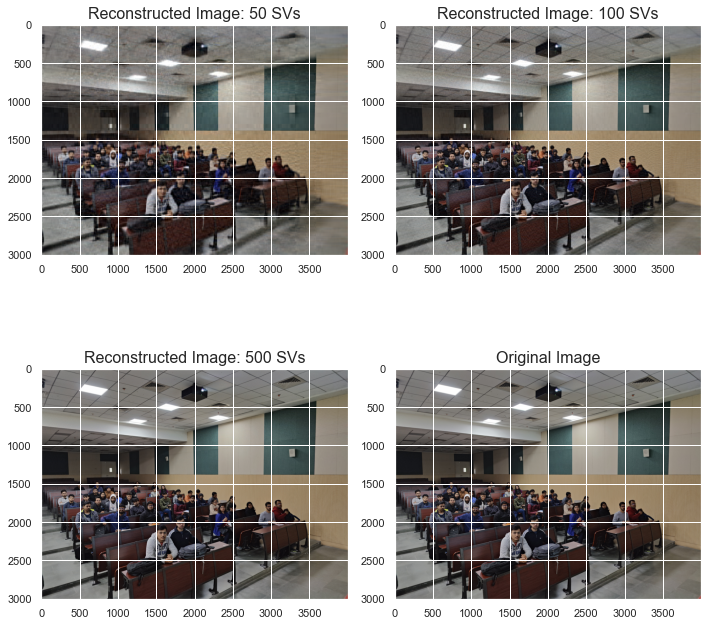

In [191]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(reconst_img_50)
axs[0, 0].set_title('Reconstructed Image: 50 SVs', size=16)
axs[0, 1].imshow(reconst_img_100)
axs[0, 1].set_title('Reconstructed Image: 100 SVs', size=16)
axs[1, 0].imshow(reconst_img_500)
axs[1, 0].set_title('Reconstructed Image: 500 SVs', size=16)
axs[1, 1].imshow(myImg)
axs[1, 1].set_title('Original Image', size=16)
plt.tight_layout()
plt.show()